## Bitcoin Price Prediction | Machine Learning Project

63011119 Chakrin Deesit\
63011216 Nontharat Kijteng\
63011278 Prima Sirinapapant

### Project Aims
- Predict the Bitcoin opening prices up to 1 week in the future at a tolerable risk
- Gain better insights on how bitcoin prices behaves

### Project Setup
- Download dataset from https://www.kaggle.com/datasets/jesusgraterol/bitcoin-hist-klines-all-intervals-2017-2023
- Install Python
- Run `pip install -r requirements.txt`
- Run `ipynb` file

### Data Preprocessing

In [1]:
import pandas as pd

DATASET_PATH = "dataset.json"
btc_price_history = pd.read_json(DATASET_PATH)

### Data Visualization

The following section focuses on the discovery and data visualization of the dataset.

In [2]:
import matplotlib.pyplot as plt

def plot_price_history(title, timestamp, price, label):
    plt.figure(figsize=(12, 6))
    plt.plot(timestamp, price, label=label, color='blue')
    plt.xlabel("Timestamp")
    plt.ylabel("Price (USDT)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
class PriceHistory:
    def __init__(self, dataset):
        self.dataset = dataset

    def get_interval_dataframe(self, interval):
        interval_data = self.dataset[interval]
        open_timestamps = pd.to_datetime(interval_data["ot"], unit='ms')
        close_timestamps = pd.to_datetime(interval_data["ct"], unit='ms')

        interval_df = pd.DataFrame({
            "OpenTimestamp": open_timestamps,
            "CloseTimestamp": close_timestamps,
            "OpenPrice": interval_data["o"],
            "HighPrice": interval_data["h"],
            "LowPrice": interval_data["l"],
            "ClosePrice": interval_data["c"],
            "Volume": interval_data["v"]
        })

        return interval_df

price_history = PriceHistory(btc_price_history)

In [4]:
interval_df_1m = price_history.get_interval_dataframe("1m")
interval_df_1h = price_history.get_interval_dataframe("1h")
interval_df_1d = price_history.get_interval_dataframe("1d")
interval_df_1w = price_history.get_interval_dataframe("1w")
interval_df_1mm = price_history.get_interval_dataframe("1mm")
interval_df_3mm = price_history.get_interval_dataframe("3mm")

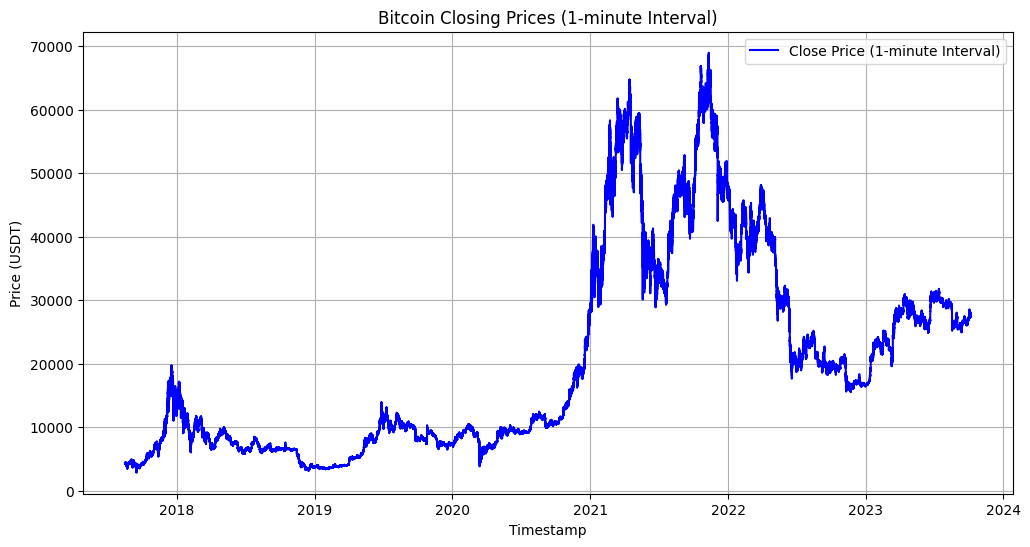

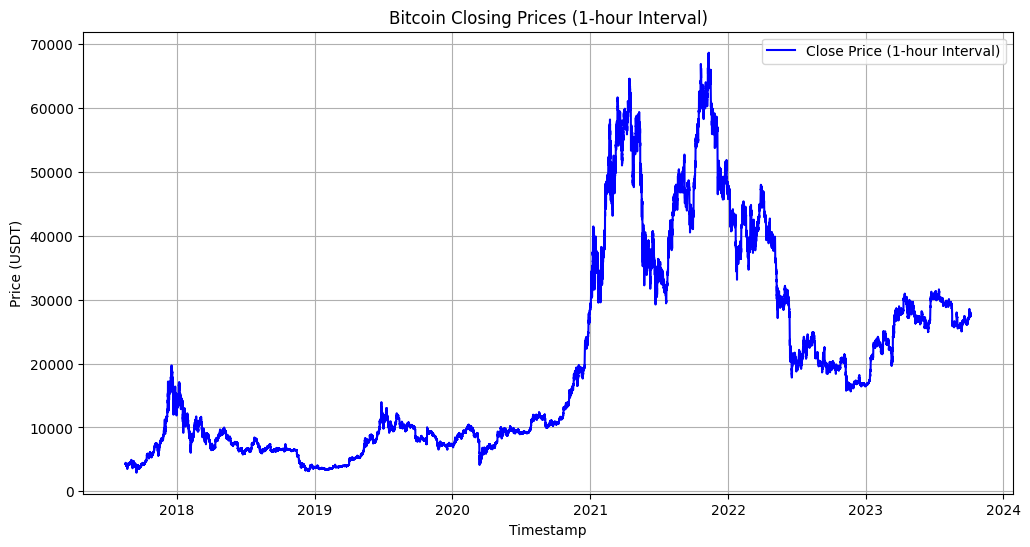

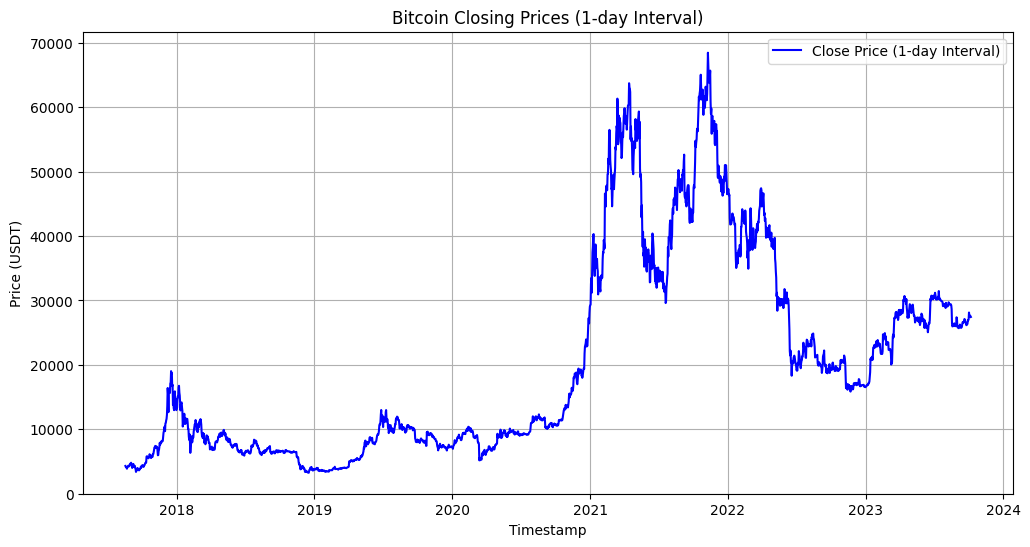

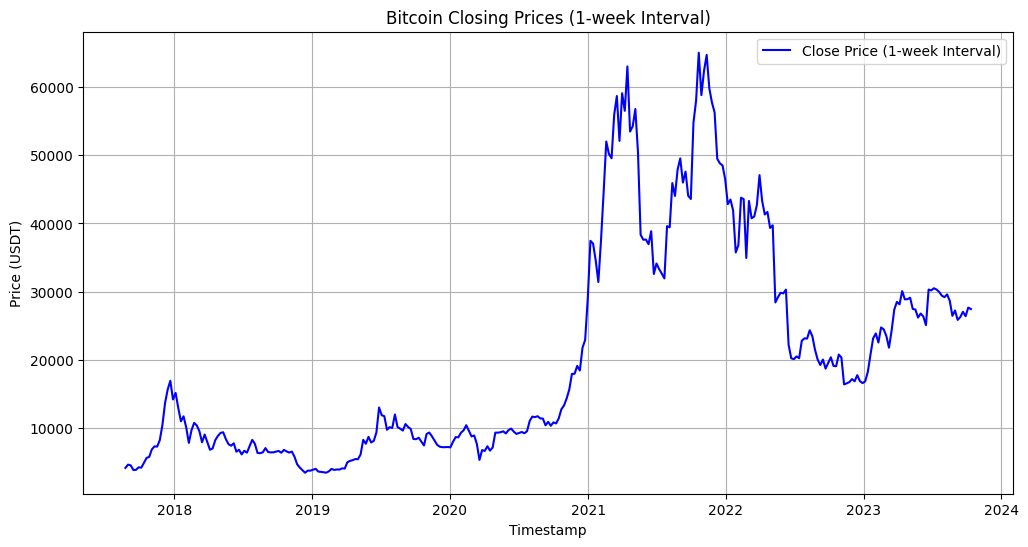

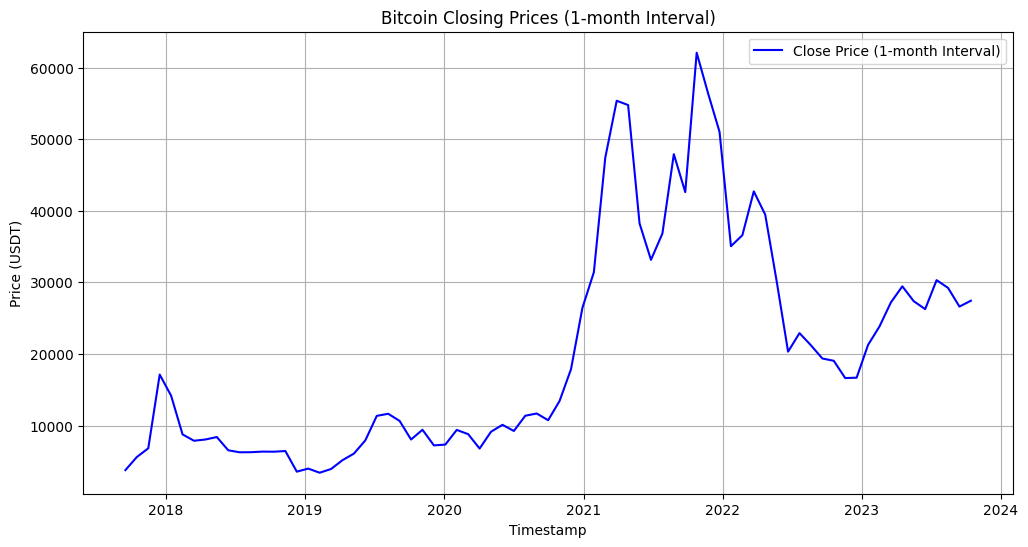

In [5]:
plot_price_history(
    "Bitcoin Closing Prices (1-minute Interval)",
    interval_df_1m["CloseTimestamp"],
    interval_df_1m["ClosePrice"],
    "Close Price (1-minute Interval)"
)

plot_price_history(
    "Bitcoin Closing Prices (1-hour Interval)",
    interval_df_1h["CloseTimestamp"],
    interval_df_1h["ClosePrice"],
    "Close Price (1-hour Interval)"
)

plot_price_history(
    "Bitcoin Closing Prices (1-day Interval)",
    interval_df_1d["CloseTimestamp"],
    interval_df_1d["ClosePrice"],
    "Close Price (1-day Interval)"
)

plot_price_history(
    "Bitcoin Closing Prices (1-week Interval)",
    interval_df_1w["CloseTimestamp"],
    interval_df_1w["ClosePrice"],
    "Close Price (1-week Interval)"
)

plot_price_history(
    "Bitcoin Closing Prices (1-month Interval)",
    interval_df_1mm["CloseTimestamp"],
    interval_df_1mm["ClosePrice"],
    "Close Price (1-month Interval)"
)

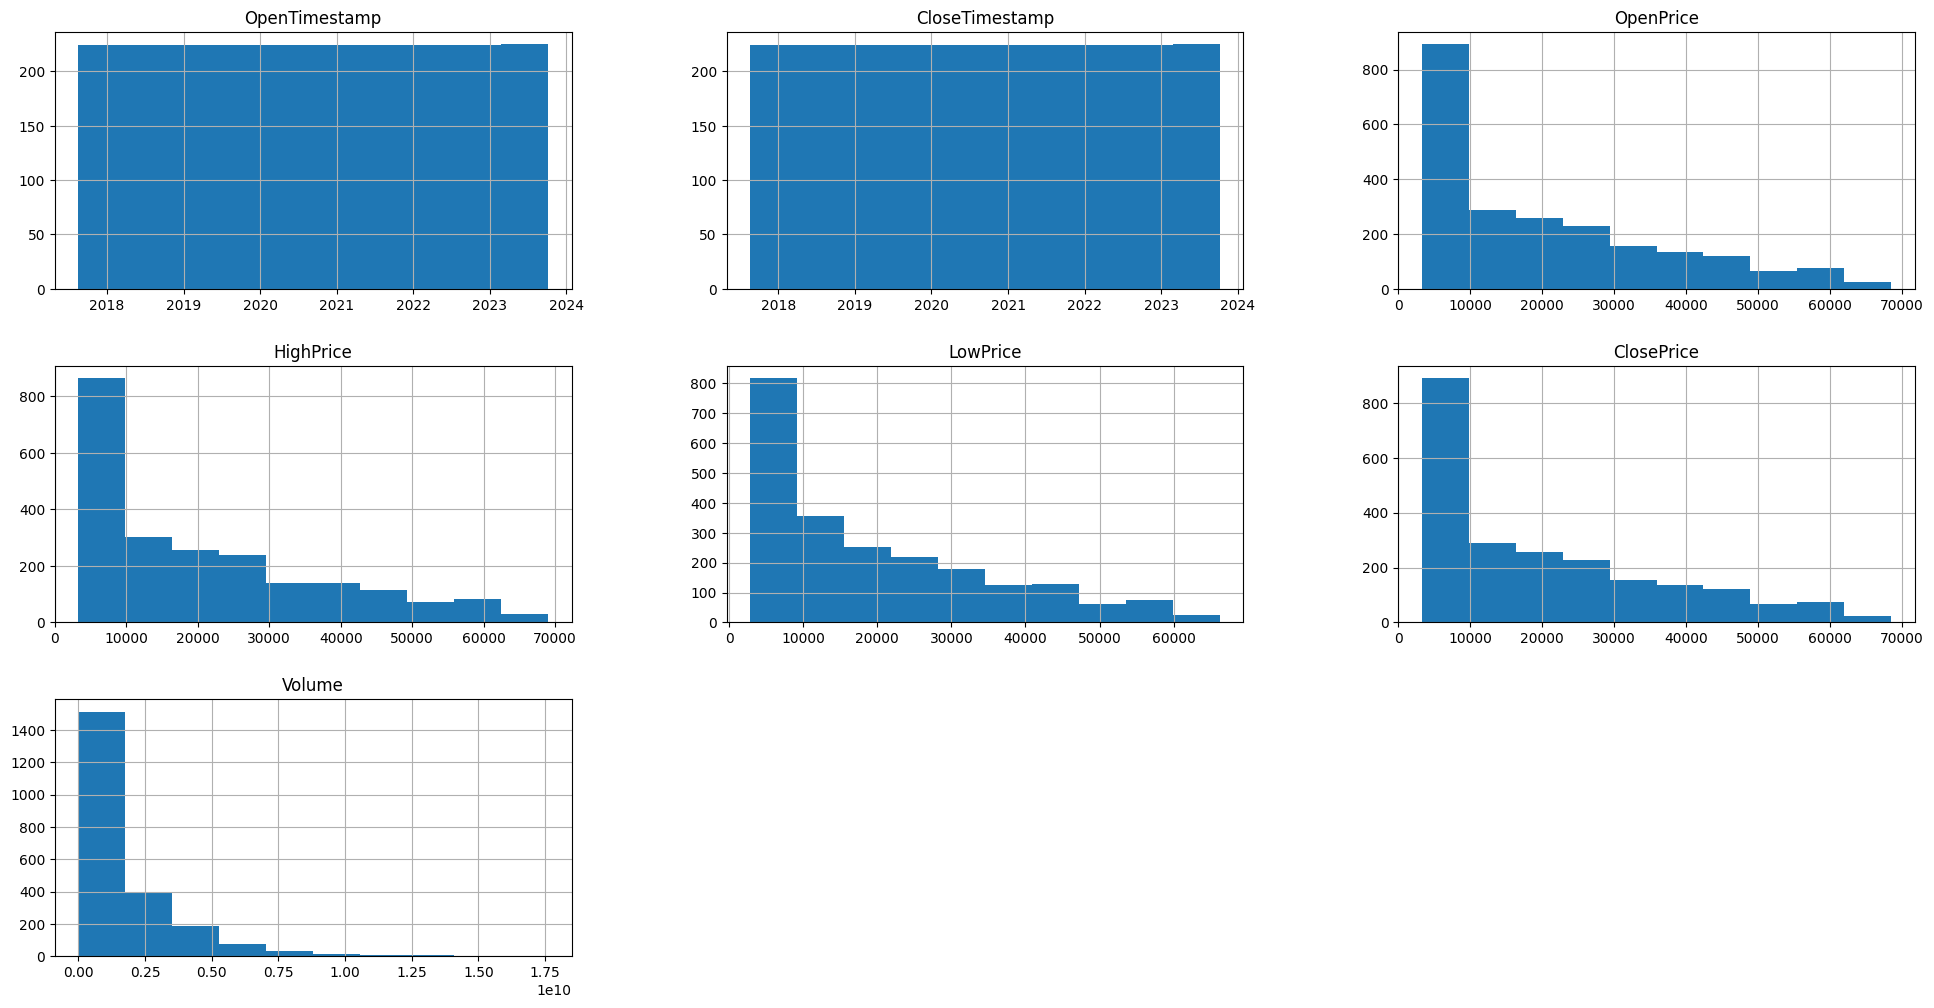

In [6]:
interval_df_1d.hist(figsize=(24, 12))
plt.show()

array([[<Axes: xlabel='OpenPrice', ylabel='OpenPrice'>,
        <Axes: xlabel='HighPrice', ylabel='OpenPrice'>,
        <Axes: xlabel='LowPrice', ylabel='OpenPrice'>,
        <Axes: xlabel='ClosePrice', ylabel='OpenPrice'>,
        <Axes: xlabel='Volume', ylabel='OpenPrice'>],
       [<Axes: xlabel='OpenPrice', ylabel='HighPrice'>,
        <Axes: xlabel='HighPrice', ylabel='HighPrice'>,
        <Axes: xlabel='LowPrice', ylabel='HighPrice'>,
        <Axes: xlabel='ClosePrice', ylabel='HighPrice'>,
        <Axes: xlabel='Volume', ylabel='HighPrice'>],
       [<Axes: xlabel='OpenPrice', ylabel='LowPrice'>,
        <Axes: xlabel='HighPrice', ylabel='LowPrice'>,
        <Axes: xlabel='LowPrice', ylabel='LowPrice'>,
        <Axes: xlabel='ClosePrice', ylabel='LowPrice'>,
        <Axes: xlabel='Volume', ylabel='LowPrice'>],
       [<Axes: xlabel='OpenPrice', ylabel='ClosePrice'>,
        <Axes: xlabel='HighPrice', ylabel='ClosePrice'>,
        <Axes: xlabel='LowPrice', ylabel='ClosePrice'>,
 

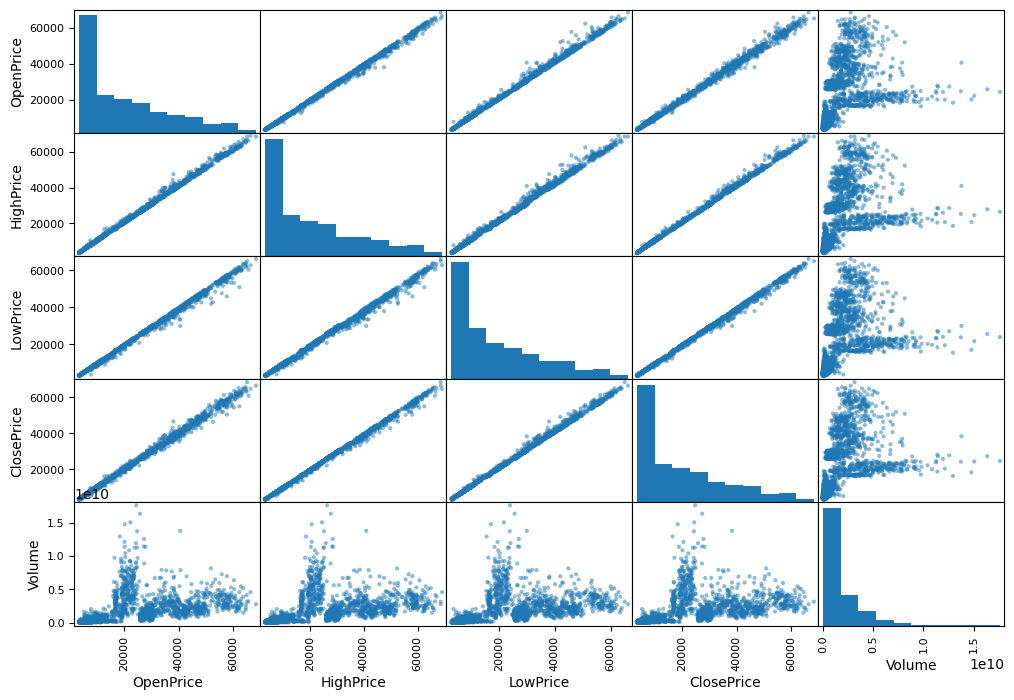

In [7]:
from pandas.plotting import scatter_matrix

attributes = ['OpenTimestamp','CloseTimestamp', 'OpenPrice', 'HighPrice', "LowPrice", "ClosePrice", "Volume"]
scatter_matrix(interval_df_1d[attributes], figsize=(12,8))

### Training and Modeling

The following section explores the different machines learning models. Including:
- Linear Regression
- Ridge Regression
- Random Forests
- Gradient Boosting

Linear Regression

Ridge Regression

Random Forests

In [8]:
from sklearn.ensemble import RandomForestRegressor

RANDOM_STATE = 42

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def plot_price_predictions(title, interval_df, model):
    X = interval_df["CloseTimestamp"].values.astype(int).reshape(-1, 1)
    y = interval_df["ClosePrice"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'R-squared (R2): {r2:.2f}')

    plt.figure(figsize=(12, 6))
    plt.plot(interval_df['CloseTimestamp'][-len(y_test):], y_test, color='blue', label='Actual Prices')
    plt.plot(interval_df['CloseTimestamp'][-len(y_test):], y_pred, color='red', label='Predicted Prices')
    plt.xlabel("Timestamp")
    plt.ylabel("Price")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

    return model

Mean Squared Error (MSE): 252608717.47
Mean Absolute Error (MAE): 13584.37
R-squared (R2): -0.26


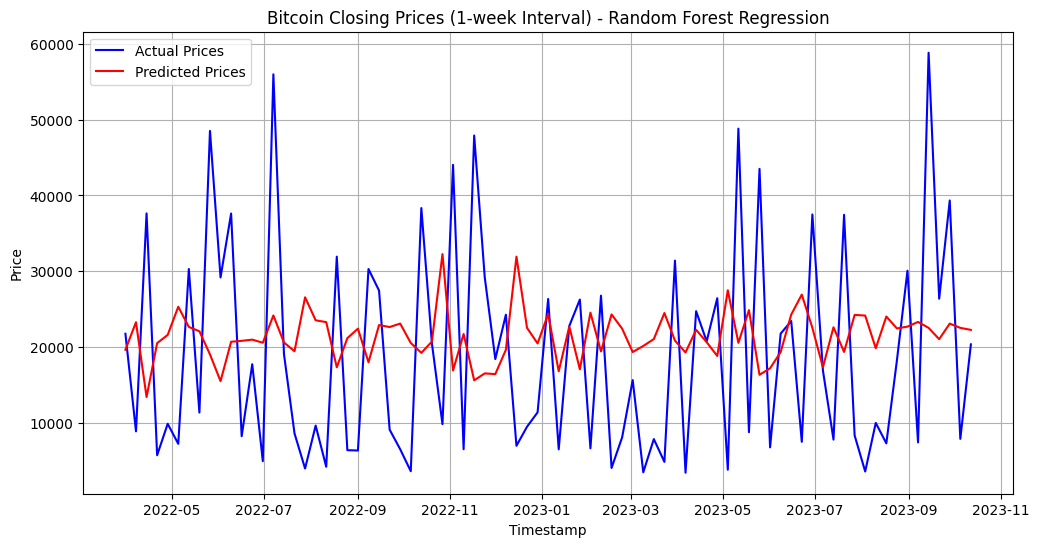

In [10]:
hyperparameters = {
    "n_estimators": 256,
    "max_depth": 8,
    "min_samples_leaf": 4,
}

random_forest_1w = RandomForestRegressor(
    n_estimators=hyperparameters.get('n_estimators'),
    max_depth=hyperparameters.get('max_depth'),
    min_samples_leaf=hyperparameters.get('min_samples_leaf'),
    random_state=RANDOM_STATE,
    n_jobs=-1
)

trained_random_forest_1w = plot_price_predictions(
    "Bitcoin Closing Prices (1-week Interval) - Random Forest Regression",
    interval_df_1w,
    random_forest_1w,
)

In [11]:
prediction = trained_random_forest_1w.predict([[1696204799], [1696809599], [1697414399]])

prediction

array([24246.89411179, 24166.4934479 , 24166.4934479 ])

### Fine-Tuning

The chosen model is the Random Forest

In [12]:
from sklearn.model_selection import GridSearchCV

X = interval_df_1w["CloseTimestamp"].values.astype(int).reshape(-1, 1)
y = interval_df_1w["ClosePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

param_grid = {
    'n_estimators': [8, 32, 64, 128, 256, 512],
    'max_depth': [None, 8, 16, 32],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

random_forest = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(random_forest, param_grid, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 16, 'n_estimators': 256}


Mean Squared Error (MSE): 216976414.16
Mean Absolute Error (MAE): 12616.45
R-squared (R2): -0.08


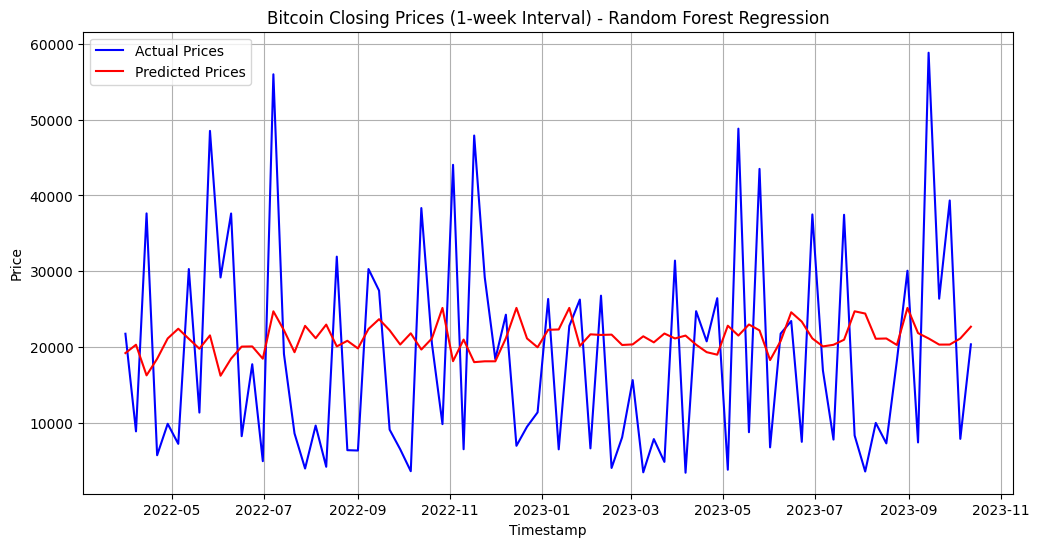

In [13]:
hyperparameters = {
    "n_estimators": 256,
    "max_depth": None,
    "min_samples_leaf": 16,
}

random_forest_1w = RandomForestRegressor(
    n_estimators=hyperparameters.get('n_estimators'),
    max_depth=hyperparameters.get('max_depth'),
    min_samples_leaf=hyperparameters.get('min_samples_leaf'),
    random_state=RANDOM_STATE,
    n_jobs=-1
)

trained_random_forest_1w = plot_price_predictions(
    "Bitcoin Closing Prices (1-week Interval) - Random Forest Regression",
    interval_df_1w,
    random_forest_1w,
)

In [14]:
prediction = trained_random_forest_1w.predict([[1696204799], [1696809599]])

prediction

array([24479.29537176, 24714.89578962])